In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
color_map = plt.cm.winter
from matplotlib.patches import RegularPolygon
import math
from PIL import Image
from IPython.display import Image

# 2018-2019 Stanley Cup Final
## _Boston Bruins vs St Louis Blues_
-----

To the casual observer, it would seem that the St Louis Blues were blown out in Game 6 but dominated in Game 7.

Let's look at a few different stats to see if that was the case (Downloaded Data sets from Kaggle.com)

In [3]:
# File to Load (pull in player_info to join with specific game stats)
file_to_load = "player_info.csv"

# Read and store into Pandas data frame
player_info = pd.read_csv(file_to_load)

In [4]:
# File to Load (Gm 6 skater stats)
file_to_load = "Gm6_skater_stats.csv"

# Read and store into Pandas data frame
gm6_skater_stats = pd.read_csv(file_to_load)

# GAME 6

The stat files only identified the players by a player_id.  
Needed to join these data sets with the player_info data.

In [5]:
gm6_merge = pd.merge(gm6_skater_stats, player_info)
columnsName = list(gm6_merge.columns)
gm6_merge = pd.DataFrame(gm6_merge, columns = ['game_id', 'player_id', 'firstName', 'lastName', 'team_id', 'timeOnIce',
 'assists', 'goals', 'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins', 'faceoffTaken',
 'takeaways', 'giveaways', 'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
 'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'nationality', 'birthCity', 'primaryPosition', 'birthDate', 'link'])

In [65]:
boston = gm6_merge[gm6_merge['team_id'] == 6]
stLouis = gm6_merge[gm6_merge['team_id'] == 19]

First I created 2 dataframes, one for each team, for Game 6 player stats

Then I took a look at data by team

In [66]:
boston

,game_id,player_id,firstName,lastName,team_id,timeOnIce,assists,goals,shots,hits,...,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,nationality,birthCity,primaryPosition,birthDate,link
0,2018030416,8473419,Brad,Marchand,6,947,1,1,1,0,...,0,1,624,193,130,CAN,Halifax,LW,5/11/1988,/api/v1/people/8473419
1,2018030416,8471276,David,Krejci,6,906,1,0,2,1,...,2,2,831,2,73,CZE,Sternberk,C,4/28/1986,/api/v1/people/8471276
2,2018030416,8478569,Noel,Acciari,6,911,0,0,3,3,...,2,0,801,88,22,USA,Johnston,C,12/1/1991,/api/v1/people/8478569
3,2018030416,8477956,David,Pastrnak,6,806,1,1,4,2,...,1,0,676,0,130,CZE,Havirov,RW,5/25/1996,/api/v1/people/8477956
4,2018030416,8479325,Charlie,McAvoy,6,1522,0,0,1,5,...,0,0,1326,144,52,USA,Long Beach,D,12/21/1997,/api/v1/people/8479325
5,2018030416,8480901,Karson,Kuhlman,6,787,0,1,1,1,...,0,2,785,2,0,USA,Esko,C,9/26/1995,/api/v1/people/8480901
6,2018030416,8475186,John,Moore,6,1026,0,0,0,1,...,3,0,751,253,22,USA,Winnetka,D,11/19/1990,/api/v1/people/8475186
7,2018030416,8476792,Torey,Krug,6,1321,1,0,3,0,...,1,2,1042,97,182,USA,Livonia,D,4/12/1991,/api/v1/people/8476792
8,2018030416,8476374,Sean,Kuraly,6,1022,1,0,2,3,...,2,1,797,203,22,USA,Dublin,C,1/20/1993,/api/v1/people/8476374
9,2018030416,8478498,Jake,DeBrusk,6,794,1,0,4,2,...,2,2,742,0,52,CAN,Edmonton,LW,10/17/1996,/api/v1/people/8478498


# Which players for each team played the most minutes? 

## A little background info for non-hockey fans:

* Each period = 1200 (20 min)
* Total game = 3600 (60 min)

## Boston

In [67]:
icetime_boston = boston[['firstName', 'lastName', 'primaryPosition', 'timeOnIce', 'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce']]
icetime_boston[icetime_boston['timeOnIce'] > 1200]

,firstName,lastName,primaryPosition,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
4,Charlie,McAvoy,D,1522,1326,144,52
7,Torey,Krug,D,1321,1042,97,182
11,Zdeno,Chara,D,1335,1134,201,0
16,Brandon,Carlo,D,1232,967,265,0


All are defensemen and all played over 20 minutes of the game.

In [33]:
# toi_bins = [0,540, 840, 1440, 1500, 3600]
# toi_labels = ['under 10 min','10-14','15-19','20-24','25+']
# icetime_boston['TOI Bin'] = pd.cut(icetime_boston['timeOnIce'], toi_bins, labels=toi_labels)
# icetime_boston.head()

In [32]:
# plt.figure(figsize=(10,8))
# sns.displot(icetime_boston, 
#             x="timeOnIce", 
#             bins=5)
# sns.displot(icetime_boston, 
#             x="evenTimeOnIce", 
#             bins=5)
# sns.displot(icetime_boston, 
#             x="shortHandedTimeOnIce", 
#             bins=5)
# sns.displot(icetime_boston, 
#             x="powerPlayTimeOnIce", 
#             bins=5)

array([[<AxesSubplot:title={'center':'timeOnIce'}>,
        <AxesSubplot:title={'center':'evenTimeOnIce'}>],
       [<AxesSubplot:title={'center':'shortHandedTimeOnIce'}>,
        <AxesSubplot:title={'center':'powerPlayTimeOnIce'}>]],
      dtype=object)

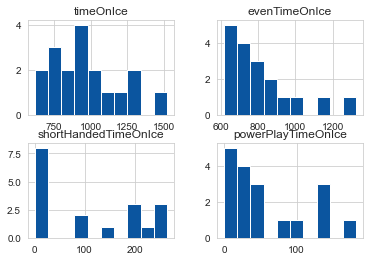

In [68]:
icetime_boston.hist()

From the graphs above, the majority of players play 15 min or less each game.\
When it comes to special teams, short-handed or power-play time, the graphs are skewed.\
There are at least 11 people on the team that do not have any ice time in these situations.

## St Louis

In [35]:
stLouis

,game_id,player_id,firstName,lastName,team_id,timeOnIce,assists,goals,shots,hits,...,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,nationality,birthCity,primaryPosition,birthDate,link
18,2018030416,8474125,Carl,Gunnarsson,19,897,0,0,1,0,...,1,1,875,22,0,SWE,Orebro,D,11/9/1986,/api/v1/people/8474125
19,2018030416,8474565,Alex,Pietrangelo,19,1575,1,0,3,0,...,0,-3,1187,104,284,CAN,King City,D,1/18/1990,/api/v1/people/8474565
20,2018030416,8478407,Vince,Dunn,19,876,0,0,3,0,...,1,-3,668,17,191,CAN,Mississauga,D,10/29/1996,/api/v1/people/8478407
21,2018030416,8474034,Patrick,Maroon,19,676,0,0,0,1,...,0,-2,455,0,221,USA,St. Louis,LW,4/23/1988,/api/v1/people/8474034
22,2018030416,8470151,Jay,Bouwmeester,19,1299,0,0,0,1,...,2,0,1190,107,2,CAN,Edmonton,D,9/27/1983,/api/v1/people/8470151
23,2018030416,8476892,Colton,Parayko,19,1568,0,0,3,0,...,1,0,1250,75,243,CAN,St. Albert,D,5/12/1993,/api/v1/people/8476892
24,2018030416,8477482,Zach,Sanford,19,820,0,0,0,4,...,0,0,761,59,0,USA,Salem,LW,11/9/1994,/api/v1/people/8477482
25,2018030416,8480023,Robert,Thomas,19,561,0,0,0,1,...,1,-2,561,0,0,CAN,Aurora,C,7/2/1999,/api/v1/people/8480023
26,2018030416,8475768,Jaden,Schwartz,19,1175,0,0,1,4,...,0,-1,955,0,220,CAN,Wilcox,LW,6/25/1992,/api/v1/people/8475768
27,2018030416,8476897,Oskar,Sundqvist,19,869,0,0,1,4,...,0,-1,754,114,1,SWE,Boden,C,3/23/1994,/api/v1/people/8476897


In [36]:
icetime_stLouis = stLouis[['firstName', 'lastName', 'primaryPosition', 'timeOnIce', 'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce']]
icetime_stLouis[icetime_stLouis['timeOnIce'] > 1200]

,firstName,lastName,primaryPosition,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
19,Alex,Pietrangelo,D,1575,1187,104,284
22,Jay,Bouwmeester,D,1299,1190,107,2
23,Colton,Parayko,D,1568,1250,75,243


Also, all are defensemen that played over 20 minutes of the game.

array([[<AxesSubplot:title={'center':'timeOnIce'}>,
        <AxesSubplot:title={'center':'evenTimeOnIce'}>],
       [<AxesSubplot:title={'center':'shortHandedTimeOnIce'}>,
        <AxesSubplot:title={'center':'powerPlayTimeOnIce'}>]],
      dtype=object)

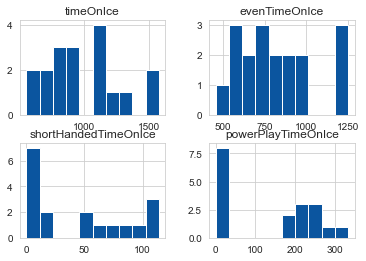

In [37]:
icetime_stLouis.hist()

From the graphs above, the majority of players play 18 min or less each game.\
St Louis also has at least 11 people on the team that do not have any ice time in these situations.\
Usually if a player has high minutes on the power play, they have lower minutes on the penalty kill.

In [38]:
# File to Load (loading clean data without index change)
file_to_load = "Gm6_data_clean.csv"

# Read and store into Pandas data frame
gm_6 = pd.read_csv(file_to_load)

# Which team was credited with the most hits? 

## A little background info for non-hockey fans:
For contact to be counted as a hit:
* An opposing player must have the puck, or have just gotten rid of it (within 3 seconds) to be eligible to get hit.
* The contact must impede the opposing player in some manner (at least slow him up with direct contact).
* The contact must also be intentional and legal for it to register as a hit in the stats.

In [39]:
first_period_hits = gm_6.loc[(gm_6['event'] == 'Hit') & (gm_6['period'] == 1)]
second_period_hits = gm_6.loc[(gm_6['event'] == 'Hit') & (gm_6['period'] == 2)]
third_period_hits = gm_6.loc[(gm_6['event'] == 'Hit') & (gm_6['period'] == 3)]

In [40]:
# Then we can group them by team id to get a count per team by period
by_team1 = first_period_hits.groupby('team_id_for')
by_team2 = second_period_hits.groupby('team_id_for')
by_team3 = third_period_hits.groupby('team_id_for')
gm6_by_team_p1 = by_team1['event'].count()
gm6_by_team_p2 = by_team2['event'].count()
gm6_by_team_p3 = by_team3['event'].count()

combine_gm6 = pd.concat([gm6_by_team_p1, gm6_by_team_p2, gm6_by_team_p3], axis=1)
combine_gm6.columns = ['First Period', 'Second Period', 'Third Period']
combine_gm6.index = ['Boston Bruins', 'St Louis Blues']
combine_gm6

,First Period,Second Period,Third Period
Boston Bruins,10,9,8
St Louis Blues,9,14,6


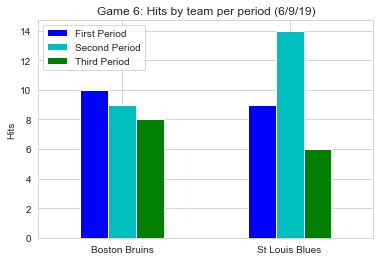

In [58]:
colors = ['b','c','g']
ax = combine_gm6.plot(kind='bar', color=colors)
plt.xticks(rotation=360)
ax.set_title('Game 6: Hits by team per period (6/9/19)')
ax.set_ylabel('Hits')
plt.show()

Bruins are pretty consistent with contact through out the game.\
Blues had quite a surge in the second period of the game.\
This makes sense when you know that Boston ended the first period leading 1-0, so St Louis was playing from behind.

In [ ]:
# File to Load (Gm 7 skater stats)
file_to_load = "Gm7_skater_stats.csv"

# Read and store into Pandas data frame
gm7_skater_stats = pd.read_csv(file_to_load)

# GAME 7

In [43]:
gm7_merge = pd.merge(gm7_skater_stats, player_info)
columnsName = list(gm7_merge.columns)
gm7_merge = pd.DataFrame(gm7_merge, columns = ['game_id', 'player_id', 'firstName', 'lastName', 'team_id', 'timeOnIce',
 'assists', 'goals', 'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins', 'faceoffTaken',
 'takeaways', 'giveaways', 'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
 'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'nationality', 'birthCity', 'primaryPosition', 'birthDate', 'link'])
gm7_merge.head()

,game_id,player_id,firstName,lastName,team_id,timeOnIce,assists,goals,shots,hits,...,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,nationality,birthCity,primaryPosition,birthDate,link
0,2018030417,8474125,Carl,Gunnarsson,19,903,0,0,0,2,...,2,0,856,47,0,SWE,Orebro,D,11/9/1986,/api/v1/people/8474125
1,2018030417,8474565,Alex,Pietrangelo,19,1556,1,1,3,2,...,4,3,1491,65,0,CAN,King City,D,1/18/1990,/api/v1/people/8474565
2,2018030417,8478407,Vince,Dunn,19,818,0,0,0,1,...,1,1,818,0,0,CAN,Mississauga,D,10/29/1996,/api/v1/people/8478407
3,2018030417,8474034,Patrick,Maroon,19,617,0,0,0,1,...,1,0,617,0,0,USA,St. Louis,LW,4/23/1988,/api/v1/people/8474034
4,2018030417,8470151,Jay,Bouwmeester,19,1714,1,0,0,3,...,3,2,1641,73,0,CAN,Edmonton,D,9/27/1983,/api/v1/people/8470151


In [44]:
boston = gm7_merge[gm7_merge['team_id'] == 6]
stLouis = gm7_merge[gm7_merge['team_id'] == 19]

In [45]:
boston

,game_id,player_id,firstName,lastName,team_id,timeOnIce,assists,goals,shots,hits,...,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,nationality,birthCity,primaryPosition,birthDate,link
18,2018030417,8473419,Brad,Marchand,6,1216,0,0,3,1,...,0,0,1111,0,105,CAN,Halifax,LW,5/11/1988,/api/v1/people/8473419
19,2018030417,8471276,David,Krejci,6,1219,1,0,2,0,...,0,0,1204,0,15,CZE,Sternberk,C,4/28/1986,/api/v1/people/8471276
20,2018030417,8478569,Noel,Acciari,6,527,0,0,1,3,...,2,-1,527,0,0,USA,Johnston,C,12/1/1991,/api/v1/people/8478569
21,2018030417,8477956,David,Pastrnak,6,1187,0,0,3,0,...,1,-2,1082,0,105,CZE,Havirov,RW,5/25/1996,/api/v1/people/8477956
22,2018030417,8479325,Charlie,McAvoy,6,1562,0,0,0,0,...,0,-2,1554,0,8,USA,Long Beach,D,12/21/1997,/api/v1/people/8479325
23,2018030417,8480901,Karson,Kuhlman,6,876,0,0,0,1,...,0,-1,861,0,15,USA,Esko,C,9/26/1995,/api/v1/people/8480901
24,2018030417,8475186,John,Moore,6,705,0,0,2,1,...,0,0,705,0,0,USA,Winnetka,D,11/19/1990,/api/v1/people/8475186
25,2018030417,8476792,Torey,Krug,6,1586,0,0,4,8,...,0,-1,1474,0,112,USA,Livonia,D,4/12/1991,/api/v1/people/8476792
26,2018030417,8476891,Matt,Grzelcyk,6,1076,0,1,2,3,...,0,-1,1061,0,15,USA,Charlestown,D,1/5/1994,/api/v1/people/8476891
27,2018030417,8476374,Sean,Kuraly,6,825,0,0,3,0,...,1,-2,825,0,0,USA,Dublin,C,1/20/1993,/api/v1/people/8476374


# Let's again look at which players player the longest for Game 7

## Will it be the same players?

## Boston

In [62]:
icetime_boston = boston[['firstName', 'lastName', 'primaryPosition', 'timeOnIce', 'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce']]
icetime_boston[icetime_boston['timeOnIce'] > 1200]

#This time not all are defensemen. However Boston was losing 2-1 at the end of the first period so they needed to come back.

,firstName,lastName,primaryPosition,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
18,Brad,Marchand,LW,1216,1111,0,105
19,David,Krejci,C,1219,1204,0,15
22,Charlie,McAvoy,D,1562,1554,0,8
25,Torey,Krug,D,1586,1474,0,112


It's not all defensemen this time.\
However, Boston was losing 2-1 at the end of the first period so they needed to come back.

array([[<AxesSubplot:title={'center':'timeOnIce'}>,
        <AxesSubplot:title={'center':'evenTimeOnIce'}>],
       [<AxesSubplot:title={'center':'shortHandedTimeOnIce'}>,
        <AxesSubplot:title={'center':'powerPlayTimeOnIce'}>]],
      dtype=object)

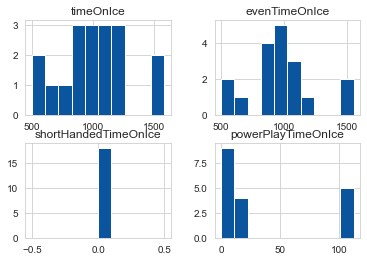

In [47]:
icetime_boston.hist()

Game 7 only had 1 penalty called against the Blues, so Boston had no short handed time on ice.\
I also noticed that the time on ice is more centralized.

## St Louis

In [48]:
stLouis

,game_id,player_id,firstName,lastName,team_id,timeOnIce,assists,goals,shots,hits,...,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,nationality,birthCity,primaryPosition,birthDate,link
0,2018030417,8474125,Carl,Gunnarsson,19,903,0,0,0,2,...,2,0,856,47,0,SWE,Orebro,D,11/9/1986,/api/v1/people/8474125
1,2018030417,8474565,Alex,Pietrangelo,19,1556,1,1,3,2,...,4,3,1491,65,0,CAN,King City,D,1/18/1990,/api/v1/people/8474565
2,2018030417,8478407,Vince,Dunn,19,818,0,0,0,1,...,1,1,818,0,0,CAN,Mississauga,D,10/29/1996,/api/v1/people/8478407
3,2018030417,8474034,Patrick,Maroon,19,617,0,0,0,1,...,1,0,617,0,0,USA,St. Louis,LW,4/23/1988,/api/v1/people/8474034
4,2018030417,8470151,Jay,Bouwmeester,19,1714,1,0,0,3,...,3,2,1641,73,0,CAN,Edmonton,D,9/27/1983,/api/v1/people/8470151
5,2018030417,8476892,Colton,Parayko,19,1657,0,0,2,2,...,5,0,1657,0,0,CAN,St. Albert,D,5/12/1993,/api/v1/people/8476892
6,2018030417,8477482,Zach,Sanford,19,828,0,1,2,1,...,0,1,828,0,0,USA,Salem,LW,11/9/1994,/api/v1/people/8477482
7,2018030417,8475768,Jaden,Schwartz,19,862,2,0,1,1,...,0,2,862,0,0,CAN,Wilcox,LW,6/25/1992,/api/v1/people/8475768
8,2018030417,8476897,Oskar,Sundqvist,19,1053,0,0,2,2,...,0,-1,1027,26,0,SWE,Boden,C,3/23/1994,/api/v1/people/8476897
9,2018030417,8477964,Ivan,Barbashev,19,1043,0,0,1,7,...,1,-1,1017,26,0,RUS,Moscow,C,12/14/1995,/api/v1/people/8477964


In [49]:
icetime_stLouis = stLouis[['firstName', 'lastName', 'primaryPosition', 'timeOnIce', 'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce']]
icetime_stLouis[icetime_stLouis['timeOnIce'] > 1200]


,firstName,lastName,primaryPosition,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
1,Alex,Pietrangelo,D,1556,1491,65,0
4,Jay,Bouwmeester,D,1714,1641,73,0
5,Colton,Parayko,D,1657,1657,0,0


Blues had the same 3 players from Game 6 play over 20 min in Game 7.

array([[<AxesSubplot:title={'center':'timeOnIce'}>,
        <AxesSubplot:title={'center':'evenTimeOnIce'}>],
       [<AxesSubplot:title={'center':'shortHandedTimeOnIce'}>,
        <AxesSubplot:title={'center':'powerPlayTimeOnIce'}>]],
      dtype=object)

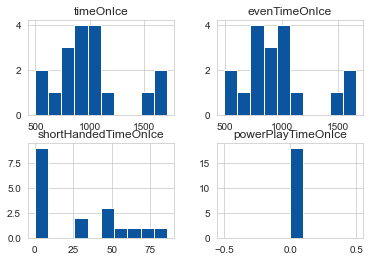

In [50]:
icetime_stLouis.hist()

Not much difference in the distribution of time on ice for Blues players between the 2 games.\
(Besides the lack of power play time)

In [51]:
# File to Load (loading clean data without index change)
file_to_load = "Gm7_data_clean.csv"

# Read and store into Pandas data frame
gm_7 = pd.read_csv(file_to_load)

# Which team was credited with the most hits for Game 7? 

## Side note: Winner of this game wins the Stanley Cup

In [52]:
# Let's look at the data on hits per period for Game 6

first_period_hits = gm_7.loc[(gm_7['event'] == 'Hit') & (gm_7['period'] == 1)]
second_period_hits = gm_7.loc[(gm_7['event'] == 'Hit') & (gm_7['period'] == 2)]
third_period_hits = gm_7.loc[(gm_7['event'] == 'Hit') & (gm_7['period'] == 3)]

In [53]:
# Then we can group them by team id to get a count per team by period
by_team1 = first_period_hits.groupby('team_id_for')
by_team2 = second_period_hits.groupby('team_id_for')
by_team3 = third_period_hits.groupby('team_id_for')
gm7_by_team_p1 = by_team1['event'].count()
gm7_by_team_p2 = by_team2['event'].count()
gm7_by_team_p3 = by_team3['event'].count()

combine_gm7 = pd.concat([gm7_by_team_p1, gm7_by_team_p2, gm7_by_team_p3], axis=1)
combine_gm7.columns = ['First Period', 'Second Period', 'Third Period']
combine_gm7.index = ['Boston Bruins', 'St Louis Blues']
combine_gm7

,First Period,Second Period,Third Period
Boston Bruins,11,10,7
St Louis Blues,14,13,9


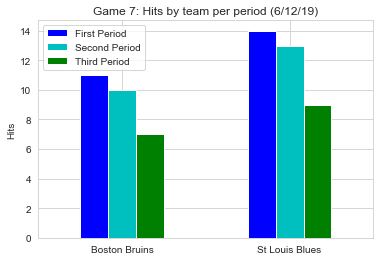

In [57]:
colors = ['b','c','g']
ax = combine_gm7.plot(kind='bar', color=colors)
plt.xticks(rotation=360)
ax.set_title('Game 7: Hits by team per period (6/12/19)')
ax.set_ylabel('Hits')
plt.show()

Bruins again are pretty consistent with contact through out the game.\
Blues didn't have a second period surge, they started the game hitting and continued a high level through 2 periods.\

### I didn't notice any big differences between Game 6 and Game 7.
Wonder if the shots on goal will show a different picture?